# Study the effect of Dropout in Multilayer Preceptron

## Summary

This notebook is created to study the effect of using Dropout in Multilayer Preceptron. I have used dropout after the activation function to see how the performance changes on using Dropout. The accuracy of an model is increased to **97.79%** on MNIST Test Dataset by using simple Multilayer Preceptron model by using dropout.

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Creating a model with two hidden layer  by using dropout 

In [37]:
model = Sequential()
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_21 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_22 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
__________

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [39]:
history = model.fit(X_train, Y_train,batch_size=64, epochs=180,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/180
48000/48000 [==============================] - 4s - loss: 1.3485 - acc: 0.5790 - val_loss: 0.5334 - val_acc: 0.8668
Epoch 2/180
48000/48000 [==============================] - 4s - loss: 0.6481 - acc: 0.8020 - val_loss: 0.3728 - val_acc: 0.8982
Epoch 3/180
48000/48000 [==============================] - 4s - loss: 0.5140 - acc: 0.8468 - val_loss: 0.3156 - val_acc: 0.9106
Epoch 4/180
48000/48000 [==============================] - 4s - loss: 0.4508 - acc: 0.8670 - val_loss: 0.2857 - val_acc: 0.9186
Epoch 5/180
48000/48000 [==============================] - 4s - loss: 0.4118 - acc: 0.8783 - val_loss: 0.2643 - val_acc: 0.9225
Epoch 6/180
48000/48000 [==============================] - 4s - loss: 0.3781 - acc: 0.8891 - val_loss: 0.2439 - val_acc: 0.9279
Epoch 7/180
48000/48000 [==============================] - 4s - loss: 0.3503 - acc: 0.8970 - val_loss: 0.2291 - val_acc: 0.9319
Epoch 8/180
48000/48000 [=============================

48000/48000 [==============================] - 4s - loss: 0.0637 - acc: 0.9795 - val_loss: 0.0742 - val_acc: 0.9792
Epoch 128/180
48000/48000 [==============================] - 4s - loss: 0.0631 - acc: 0.9794 - val_loss: 0.0754 - val_acc: 0.9788
Epoch 129/180
48000/48000 [==============================] - 4s - loss: 0.0611 - acc: 0.9802 - val_loss: 0.0762 - val_acc: 0.9789
Epoch 130/180
48000/48000 [==============================] - 4s - loss: 0.0621 - acc: 0.9795 - val_loss: 0.0747 - val_acc: 0.9796
Epoch 131/180
48000/48000 [==============================] - 4s - loss: 0.0608 - acc: 0.9800 - val_loss: 0.0748 - val_acc: 0.9789
Epoch 132/180
48000/48000 [==============================] - 4s - loss: 0.0630 - acc: 0.9800 - val_loss: 0.0755 - val_acc: 0.9793
Epoch 133/180
48000/48000 [==============================] - 4s - loss: 0.0595 - acc: 0.9814 - val_loss: 0.0748 - val_acc: 0.9796
Epoch 134/180
48000/48000 [==============================] - 4s - loss: 0.0604 - acc: 0.9808 - val_loss:

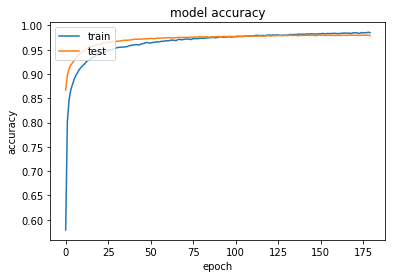

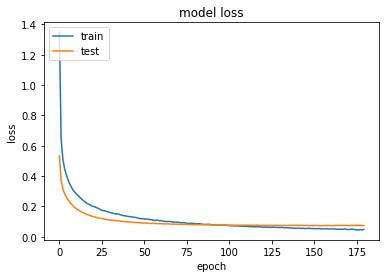

In [40]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
# evaluate the network
loss, accuracy = model.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9440/10000 [===========================>..] - ETA: 0s
Loss: 0.07, Accuracy: 97.95%


#### Creating a model with three hidden layer  by using dropout 

In [29]:
model2 = Sequential()
model2.add(Dense(128, input_shape=(784,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_14 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_15 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
__________

In [30]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [31]:
history2 = model2.fit(X_train, Y_train,batch_size=64, epochs=180,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/180
48000/48000 [==============================] - 5s - loss: 1.6063 - acc: 0.4617 - val_loss: 0.6634 - val_acc: 0.8275
Epoch 2/180
48000/48000 [==============================] - 5s - loss: 0.7969 - acc: 0.7459 - val_loss: 0.4137 - val_acc: 0.8848
Epoch 3/180
48000/48000 [==============================] - 5s - loss: 0.5979 - acc: 0.8158 - val_loss: 0.3303 - val_acc: 0.9030
Epoch 4/180
48000/48000 [==============================] - 5s - loss: 0.5039 - acc: 0.8476 - val_loss: 0.2891 - val_acc: 0.9134
Epoch 5/180
48000/48000 [==============================] - 5s - loss: 0.4458 - acc: 0.8665 - val_loss: 0.2612 - val_acc: 0.9237
Epoch 6/180
48000/48000 [==============================] - 5s - loss: 0.4058 - acc: 0.8799 - val_loss: 0.2381 - val_acc: 0.9299
Epoch 7/180
48000/48000 [==============================] - 5s - loss: 0.3679 - acc: 0.8898 - val_loss: 0.2192 - val_acc: 0.9370
Epoch 8/180
48000/48000 [=============================

48000/48000 [==============================] - 4s - loss: 0.0557 - acc: 0.9826 - val_loss: 0.0905 - val_acc: 0.9775
Epoch 128/180
48000/48000 [==============================] - 4s - loss: 0.0559 - acc: 0.9822 - val_loss: 0.0905 - val_acc: 0.9771
Epoch 129/180
48000/48000 [==============================] - 5s - loss: 0.0573 - acc: 0.9819 - val_loss: 0.0894 - val_acc: 0.9771
Epoch 130/180
48000/48000 [==============================] - 5s - loss: 0.0554 - acc: 0.9835 - val_loss: 0.0897 - val_acc: 0.9772
Epoch 131/180
48000/48000 [==============================] - 5s - loss: 0.0548 - acc: 0.9827 - val_loss: 0.0888 - val_acc: 0.9780
Epoch 132/180
48000/48000 [==============================] - 5s - loss: 0.0540 - acc: 0.9831 - val_loss: 0.0900 - val_acc: 0.9768
Epoch 133/180
48000/48000 [==============================] - 5s - loss: 0.0540 - acc: 0.9833 - val_loss: 0.0903 - val_acc: 0.9770
Epoch 134/180
48000/48000 [==============================] - 5s - loss: 0.0552 - acc: 0.9826 - val_loss:

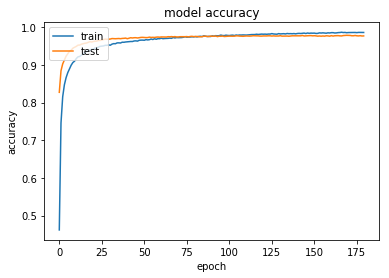

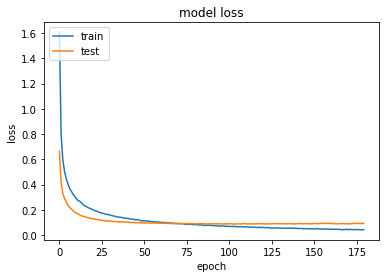

In [32]:
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
# evaluate the network
loss, accuracy = model2.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9568/10000 [===========================>..] - ETA: 0s
Loss: 0.09, Accuracy: 97.79%
